# HW 2 - Machine Learning in Healthcare, 336546

edited by **Hadas Ben-Atya and Nathan Berdugo**

# Theory Questions

### Answer 1 ###


The evaluation metric which is more important to us is the **model performance**. This metric provides us detailed and objective information about our model, which will be useful in finding flaws in our model and therefore will help us improve it. The mentioned provided information would be *Sensitivity and Specificity*, in addition to *F1, AUC, PPV, NPV* and much more. All of these parameters refer to the model performance according to the data on which we performed the training, regardless to drawbacks of the data itself.

All the advantages mentioned above cannot necessarily be inferred when using the *Accuracy* as an evaluation metric; **A simple example will demonstrate it**.
Assume you are trying to predict *the prevalence of an extremely rare disease* in a randomly chosen population. One could use a *naïve estimator* that predicts all of the population to be healthy. The accuracy model will indicate excellent results (because - as mentioned - the disease is *extremely rare*). This evaluation will not provide an objective, data-independent result.

Therefore, it's much more efficient to choose a model performance as our evaluation metric, even when dealing with a reasonable prevalence in the population such in our T1D classification.


### Answer 2 ###

In the process of choosing between the two classifiers, one should rely on numerous *important criteria* which provide helpful guidelines.

The first is **Accuracy**. The more we use relevant features, the more accurate our model will be. We should use our *common sense* in order to confirm the need of the feature, in addition to *visualization* of the features' correlation. We will always try to avoid ignoring important data that were already collected, and which will serve as useful information for our prediction model.
In the first classifier we use BP and BMI features only, as mentioned in the question, and dismiss potentially-relevant features (e.g. the Age of the patient and his level of physical activity), which might imply on his probability to get an income (a heart-attack).
In the second model we use all the mentioned features, which some of them may turn out to be useless, and should have been dismissed. This leads us to the second criteria - **Complexity**.

If we choose to include useless information, we force ourselves to use *greater computational resources* that might be expensive or even inaccessible for us. When choosing to reduce complexity by ignoring features (as with the first classifier), we can make a much more *time-efficient and cost-saving model*, that will use only relevant data and dismiss the rest of it. Moreover, the higher the number of features we use, the larger the number of samples will be needed to collect in order to reach *statistical significance*. Thus, by choosing all-features classifier, an in-depth research will be required to obtain sufficient data, which may lead again to an increase in financial expenses.

The third criteria is **Generalization**. It refers to how well the concepts learned by a machine learning model apply to specific examples not seen by the model when it was learning. By including useless features, we let irrelevant data influence our model without improving the predictive capabilities.
Such noise can adversely affect the model and impair its generalization capabilities when using testing data, because of *overfitting* to the training data and obtaining a *higher variance*. The all-features classifier might lead to this result, while the first 2-features-only classifier might result in *underfitting and high bias* - the opposite scenario of the above - which lead to a model that can neither model the training data nor generalize to new (testing) data.

The over/underfitting both lead to poor performance and could be avoided by correctly choosing the features to include. Generalization is what we get when we find *the sweet spot* between these two edges.

### Answer 3 ###

Considering the case described - in which we are required to distinguish between types of pancreatic biopsies showing T1D signs and those that do not, based on the measurements specified in the question - **we see no reason to assume that the given classification problem is linear separable**, given the amount and type of parameters that leads to our assumption that there is linear dependence between them (e.g. A common sense will lead to the idea that the bigger the size of the biopsy, the larger will be the cell-count).

Thus, it can be assumed that the best prediction model in this case would be a non-linear one - for example **Support-Vector-Machine (SVM) with a non-linear kernel**.

The other two models suggested, *LR and linear SVM*, assume linear separations of the features and therefore we assume that they are less suitable in the case described.

 


### Answer 4

While Logistic regression (LR) and Support-Vector-Machine (SVM) are closely related, there a few major differences between them that can be summarized in several aspects.

**Logistic regression (LR)** focuses on *maximizing the probability* of the data, so it returns calibrated probabilities while it rarely include maximal nor minimal values (1/0 respectively) even when the data is indeed located near the edges. This may impair the accuracy of the model.

**Support-Vector-Machine (SVM)** (in general, not necessarily SVM with linear kernel), tries to *maximize the distance* of the two closest samples by finding the best separating hyperplane that does that. When the hyperplane can be easily achieved by drawing a straight line that correctly separates our data, it is called linear SVM. Otherwise, we use non-linear SVM which transforms our data (by using kernel functions) into a higher dimensional space, resulting with a hyperplane that can now separate the data.

**While SVM is based mostly on geometrical properties of the data, LR relies much more on statistical preoperties.**

That is, while SVM maximize the distance between the hyperplane and the support vectors in each side of it (resulting in a reduced risk of misclassification of the data), LR uses different considerations (mostly statistic-based) in order to find the best separation. [1] [2]

Regarding difference in the concept of their *hyperparameters tuning*:

When discussing about LR and SVM hyperparameters, we mostly refer to **C**, or its inverse - **Lambda**.

In SVM, This hyperparameter controls the trade-off between {increasing the distance between the hyperplane and the support vectors}, and {decreasing the number of samples which are misclassified by this hyperplane}. 
C does it by *penalizing for each misclassified point*.
The higher C is, the higher the penalty for each misclassified sample is, in the expense of decreasing the distance between the hyperplane and the support vectors.

In LR, C controls the trade-off between {allowing the model to increase its complexity by using all the features it can get}, and {keeping the model as simple as possible}.
The higher C is, the higher the complexity of our model is, and the probability of reaching overfitting increases.
In this case (of LR), C works by assigning weights for each parameter included in the model. Thus,  according to the example above - a higher value of C will lead to large weights assigning.

In contrary to SVM - where C serves as a loss-function effector that can affect *accuracy* - in LR, C serves as a loss-function effector that can affect *complexity*.


---



[1] Kevin Swersky, University of Toronto, ***SVM vs LR***, http://www.cs.toronto.edu/~kswersky/wp-content/uploads/svm_vs_lr.pdf

[2] Patricia Bassey, Axum Labs, ***Logistic Regression Vs Support Vector Machines (SVM)***, https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16#:~:text=SVM%20tries%20to%20finds%20the,are%20near%20the%20optimal%20point.

*** ***

# Coding Assignment

In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
import matplotlib as mpl

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline


Loading the data and plot the data diagnosis distribution:

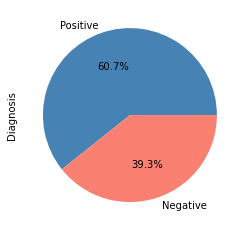

In [2]:
file_path = Path.cwd().joinpath('HW2_data.csv')
file = pd.read_csv(file_path)

Y = file['Diagnosis']
Y.value_counts().plot(kind="pie", labels=['Positive', 'Negative'], colors=['steelblue', 'salmon'], autopct='%1.1f%%')
plt.show()

### Pre-processing:
clean all nan values.

first let's find all the missing data and check the diagnosis distribution:

missing data amount =  42
missing data from the positive diagnosis = 22/343
missing data from the negative diagnosis = 20/222 



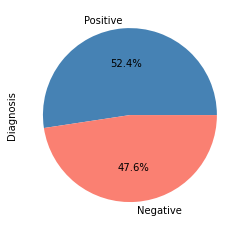

In [3]:
missing_data = file[file.isnull().any(axis=1)]
pos_nan = missing_data[missing_data['Diagnosis'] == 'Positive']
positive_val = file[file['Diagnosis'] == 'Positive']

neg_nan = missing_data[missing_data['Diagnosis'] == 'Negative']
negative_val = file[file['Diagnosis'] == 'Negative']

print('missing data amount = ', len(missing_data))
print('missing data from the positive diagnosis = %.f/%.f' %(len(pos_nan), len(positive_val)))
print('missing data from the negative diagnosis = %.f/%.f' %(len(neg_nan), len(negative_val)),'\n')

missing_data_dist = missing_data['Diagnosis']
missing_data_dist.value_counts().plot(kind="pie", labels=['Positive', 'Negative'], colors=['steelblue', 'salmon'], autopct='%1.1f%%')
plt.show()

### fixing nan-values: 
Our data consists mainly of 'Positive' samples, thus in order to reduce unnecessary/data distortion, we decided to remove missing data labeled 'Positive'

In [4]:
clean_data = file.drop(pos_nan.index)

All nan samples are now necessarily labeled as 'Negative'.

We decided to complete the missing samples with the most common value of each feature.

In order to do that, we calculated the distribution of each feature.

In [5]:
for key in neg_nan.keys():
    temp_prob = neg_nan[key].value_counts()
    dominant_val = temp_prob[temp_prob == max(temp_prob)].index[0]

    clean_data[key] = [val if not pd.isna(val) else dominant_val for val in clean_data[key]]

## Convert the data to one-hot vector:
We will ignore the 'Age' category because it's already numerical, and convert all the rest features to one-hot-vector.


In [6]:
Age = clean_data['Age'].to_numpy()
scaled_Age = (Age-np.min(Age))/(np.max(Age)-np.min(Age))
X_before_encode = clean_data.drop(['Diagnosis', 'Age'], axis=1)
y = clean_data['Diagnosis'].to_numpy().reshape(-1, 1)
enc = OneHotEncoder(drop='if_binary')
X_before_encode = enc.fit_transform(X_before_encode).toarray()
y = enc.fit_transform(y).toarray()

X = np.empty([X_before_encode.shape[0], X_before_encode.shape[1] + 1])
X[:, 0] = scaled_Age
X[:, 1:] = X_before_encode

## Split the data randomly to train-test with test fraction


In [7]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

## Compare between test & train dataset
Let's check that the distribution of the features is similar between test and train:

In [8]:
def table_plot(X_train, x_test, Y_train, y_test, clean_data):
    positive_features = clean_data.keys()
    table_dict = {}
    idx = 0
    for feat in positive_features:
        if feat == 'Age':
            avg_Age_train = round((X_train[:, idx].mean()))
            avg_Age_test = round((x_test[:, idx].mean()))
            delta = avg_Age_train - avg_Age_test
            table_dict['mean scaled Age'] = [avg_Age_train, avg_Age_test, delta]
            idx += 1
        elif feat == 'Diagnosis':
            avg_diagnosis_train = round(Y_train.mean() * 100)
            avg_diagnosis_test = round(y_test.mean() * 100)
            delta = avg_diagnosis_train - avg_diagnosis_test
            table_dict[feat] = [avg_diagnosis_train, avg_diagnosis_test, delta]
        else:
            avg_train = round(X_train[:, idx].mean() * 100)
            avg_test = round(x_test[:, idx].mean() * 100)
            delta = avg_train - avg_test
            table_dict[feat] = [avg_train, avg_test, delta]
            idx += 1

    columns = ['Train %', 'Test %', 'Delta %']
    rows = list(table_dict.keys())
    cells = list(table_dict.values())

    plt.figure(figsize=(10, 10))
    table = plt.table(cellText=cells, rowLabels=rows, colLabels=columns, loc='center')
    plt.axis("off")
    plt.grid(False)
    plt.show()

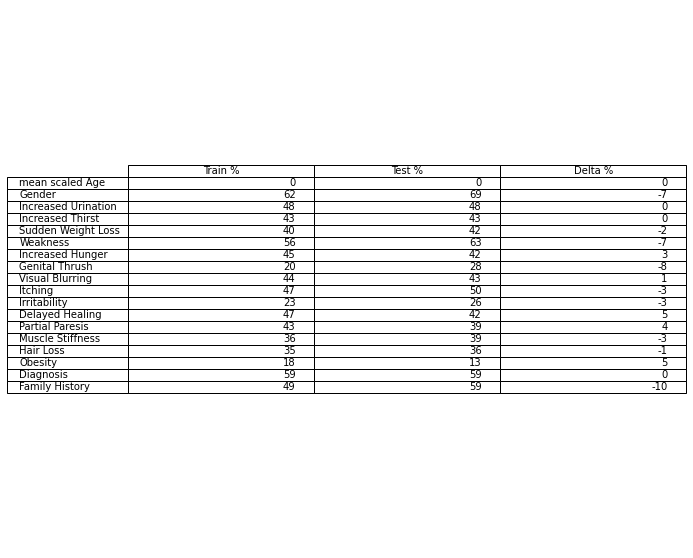

In [9]:
table_plot(X_train, x_test, Y_train, y_test, clean_data)

### Provide a detailed visualization and exploration of the data
We already saw how the data diagnosis is distributed.
Now, let's check how specific features influence the diagnosis distribution.

We will use bar-plots due to the mostly binary nature of this dataset.

In [10]:
def bar_plot(clean_data, feature,axes):
    feature_data = clean_data[[feature, 'Diagnosis']]
    sns.set_theme(style="darkgrid")
    sns.countplot(ax=axes, x=feature, hue="Diagnosis", data=feature_data)
#     axes.set_title(feature)

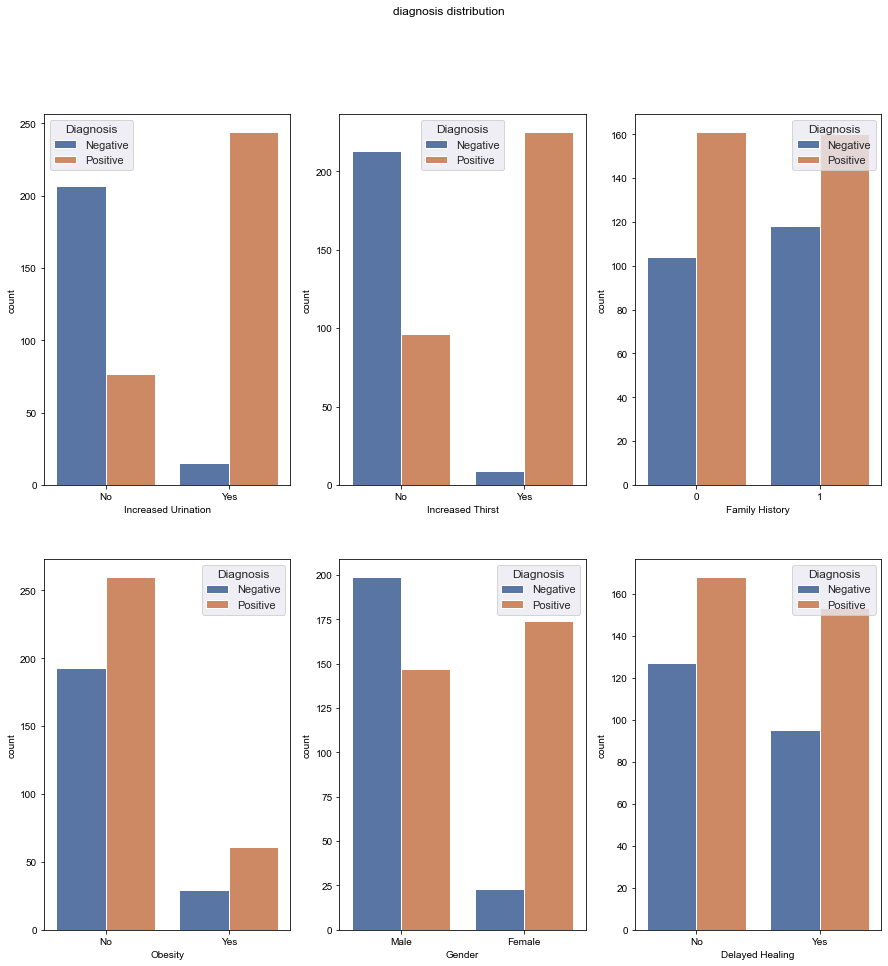

In [11]:
fig, axs = plt.subplots(2, 3 , figsize=(15, 15))
fig.suptitle('diagnosis distribution')
features = ['Increased Urination', 'Increased Thirst', 'Family History',  'Obesity', 'Gender', 'Delayed Healing']
bar_plot(clean_data, features[0], axs[0,0])
bar_plot(clean_data, features[1], axs[0,1])   
bar_plot(clean_data, features[2], axs[0,2])
bar_plot(clean_data, features[3], axs[1,0]) 
bar_plot(clean_data, features[4], axs[1,1])
bar_plot(clean_data, features[5], axs[1,2])  
plt.show()

We picked several features that we expected them to have a strong relationship to the label. As shown in the plots above, some features do have a strong relationship to the labeling, thus could be very useful in our prediction model.

'Increased Thirst' and 'Increased Urination' are examples for this strong, positive, correlation to the labeling. We expected these results due to the T1D mechanism, which may include a decrease in renal function, which in turn leads to a decrease in renal reabsorbtion and increase urination. The urinating patient will most of the time feel thirst, as a compensation mechanism designed to rehydrate the system.

In contrast, some features turned out to be less related to labeling, demonstrating a weak relation to 'Diagnosis'. This features are 'Family History', which is surprising due to some research evidence showing genetic link for the disease etiology.

Another weak-correlated feature is the 'Delayed Healing' which is surprising as well, due to the autoimmune pathopysiology of the disease, which we expected it could indicate to an impaired immune response and therefore an increase in the healing delay.

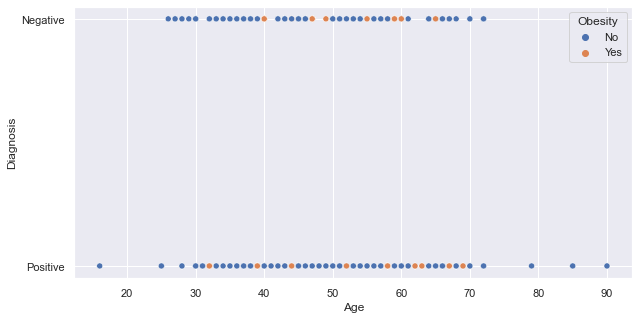

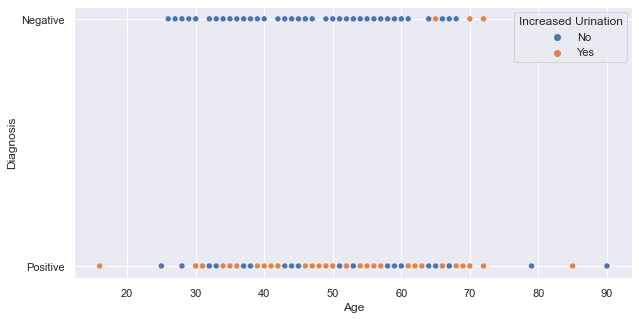

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=clean_data, x="Age", y="Diagnosis", hue="Obesity")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data=clean_data, x="Age", y="Diagnosis", hue="Increased Urination")
plt.show()

In the first (upper) plot, we got a weak correlation between **'Obesity'** and the labeling, as we expected. T1D, in contrast to T2D, doesn't include higher BMI ranking as a common disease characteristic. This is due to the T1D pathopysiology that doesn't directly involve the patient's metabolism, and rely mostly on autoimmune mechanisms and Insulin defficiency.

As for the correlation of the **'Age'** feature and the labeling, we can again observe a weak correlation. That was expected due to the reknown early onset of the disease, which implies that in any range of ages we would find a similar distribution of T1D and healthy samples.

Therefore, ***the combination of the two features with the labeling resulted in weak correlation as well***.

The second (bottom) plot represents the correlation between *'Age'*, *'Increased Urination'* and the *labeling*. As we demonstrated earlier, we couldn't find a strong connection between 'Age' and labeling. However, a strong correlation was found between 'Increased Urination' and the labeling, as we saw in the barplots.

This figure refutes the claim that the reason for increased urination is the increase in age (e.g. As a result of **incontinence** - the lack of voluntary control over urination - which characterizes the older age), and in fact **reinforces the claim that the increased urination is as a result of the disease itself - regardless of age**.

***Plot of Age distribution and its influence on the diagnosis:***

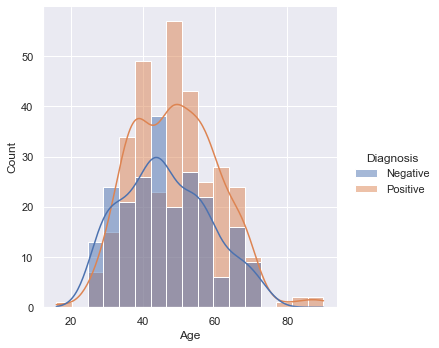

In [13]:
sns.displot(clean_data, x="Age" ,hue="Diagnosis", kde=True)
plt.show()

 We can see that the 'Age' feature is distributed similarly between the positive and negative diagnosis, which again, and with a different visualization, implies for a weak correlation between the feature and the label.
 
Thus, we expect this feature to be less useful in our prediction model.

*** ***
## Training different models
### Training Logistic Regression model:
We will use GridSearchCV to find the best logistic regression parameters. 
In addition, we will check 2 different kind of penalization methods: ***'l1'*** vs ***'l2'***.

As a visualization, we decided to use RadarPlot function ***as implemented in Tutorial 5 by Moran Davoodi with the assitance of Yuval Ben Sason, Kevin Kotzen & Alon Begin***

In [14]:
from hw2_functions import logReg_optimization

C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages

Logistic Regression:
penalty =  l1 C =  100.0 , lambda =  0.01
Loss =  0.24796950748494395 



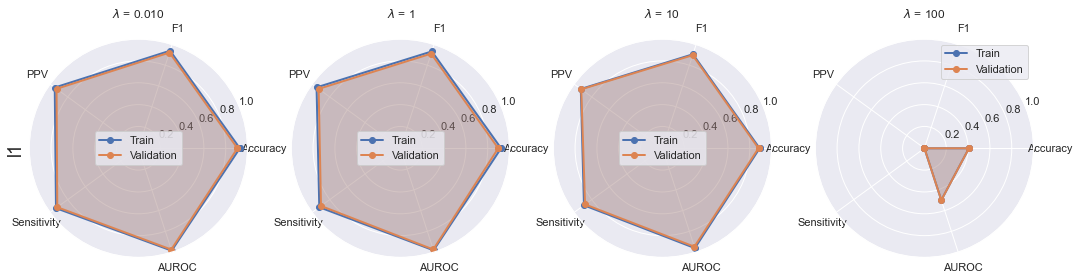

Sensitivity is 0.91
Specificity is 0.87
PPV is 0.91
NPV is 0.87
Accuracy is 0.89
F1 is 0.91
AUROC is 0.96


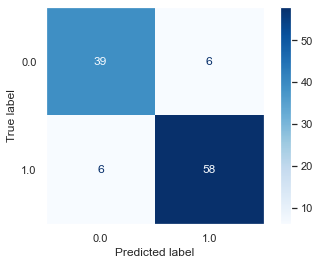

In [15]:
best_model_l1, clf_l1 = logReg_optimization('l1', X_train, Y_train, x_test, y_test)

Logistic Regression:
penalty =  l2 C =  100.0 , lambda =  0.01
Loss =  0.24604857392380827 



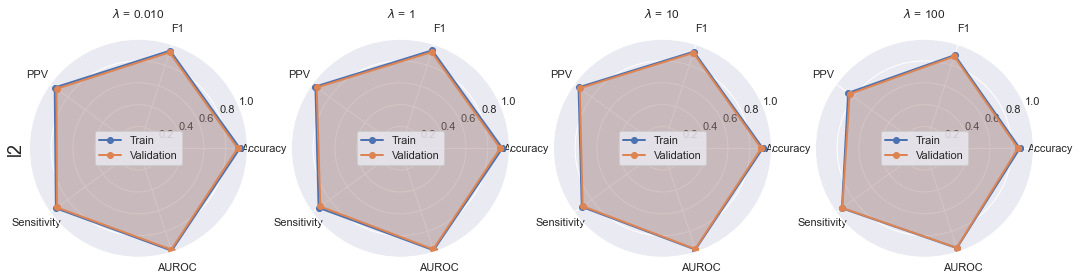

Sensitivity is 0.91
Specificity is 0.87
PPV is 0.91
NPV is 0.87
Accuracy is 0.89
F1 is 0.91
AUROC is 0.96


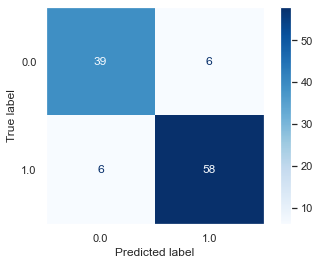

In [16]:
best_model_l2, clf_l2 = logReg_optimization('l2', X_train, Y_train, x_test, y_test)

### Support-Vector-Machine (SVM):

Support vector machine:
kernel =  linear C =  100.0
Loss =  0.46788990825688076 



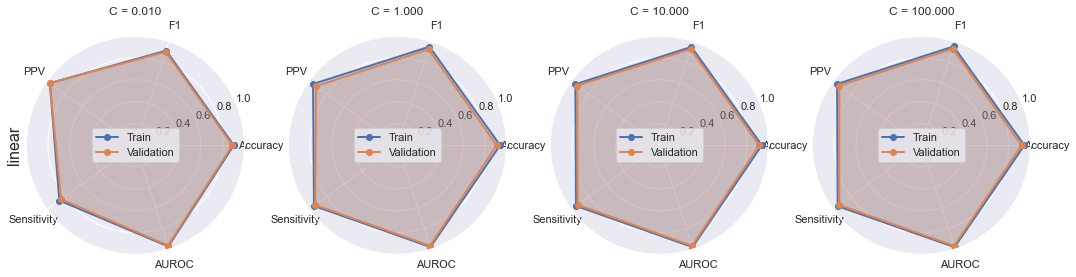

Sensitivity is 0.95
Specificity is 0.93
PPV is 0.95
NPV is 0.93
Accuracy is 0.94
F1 is 0.95
AUROC is 0.96


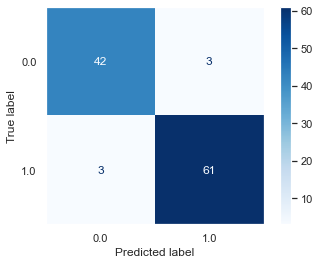

In [17]:
from hw2_functions import SVM_optimization
best_svm_linear, svm_linear = SVM_optimization(X_train, Y_train, x_test, y_test, degree=0, kernel='linear')


Support vector machine:
kernel =  rbf C =  100.0
Loss =  0.44036697247706424 



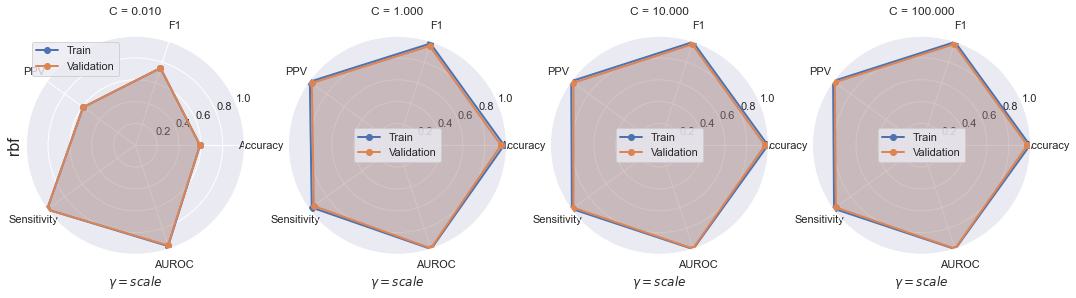

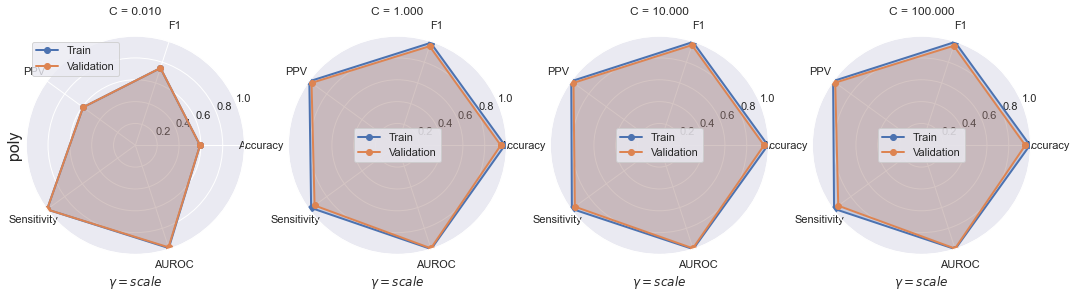

Sensitivity is 0.95
Specificity is 1.00
PPV is 1.00
NPV is 0.94
Accuracy is 0.97
F1 is 0.98
AUROC is 1.00


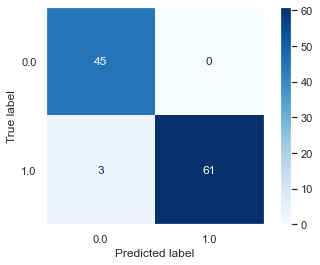

In [18]:
best_svm_nonlinear, svm_nonlinear = SVM_optimization(X_train, Y_train, x_test, y_test, degree=3, kernel='nonlinear')

### Random Forest:

random forest results: 
Sensitivity is 0.88
Specificity is 0.91
PPV is 0.93
NPV is 0.84
Accuracy is 0.89
F1 is 0.90
AUROC is 0.98


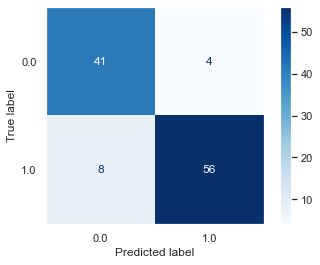

In [19]:
from hw2_functions import random_forest_optimization
rfc = random_forest_optimization(X_train, Y_train, x_test, y_test)

### Comparization between the different classifiers

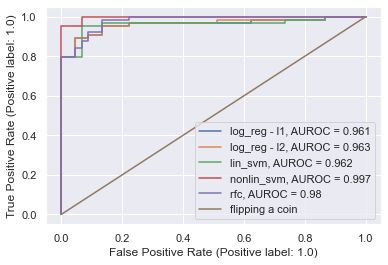

In [20]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

classifiers = [best_model_l1, best_model_l2, best_svm_linear, best_svm_nonlinear, rfc]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, x_test, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]), decimals=3))
ax.plot(np.linspace(0, 1, x_test.shape[0]), np.linspace(0, 1, x_test.shape[0]))
plt.legend(('log_reg - l1, AUROC = ' + str(roc_score[0]), 'log_reg - l2, AUROC = ' + str(roc_score[1]),
            'lin_svm, AUROC = ' + str(roc_score[2]), 'nonlin_svm, AUROC = ' + str(roc_score[3]),
            'rfc, AUROC = ' + str(roc_score[4]), 'flipping a coin'))
plt.show()

***What performs best on this dataset? Linear or non-linear models?***

We can see that the best model for our data was the **non-linear SVM** with kernel = rbf and AUROC= 0.997. 


### Find the added value of each feature from the Random Forest
  reference used for the implementation below: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [21]:
importance = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]
# Print the feature ranking
print("Feature ranking:")

keys_exc_diagnosis = clean_data.drop(['Diagnosis'], axis=1)
keys_list = list(keys_exc_diagnosis.keys())
key_sort = []
for f in range(X_train.shape[1]):
    key_sort += [keys_list[indices[f]]]
    print(key_sort[f], "(%f)" % (importance[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(60, 30), dpi=300)
data = {'keys': key_sort, 'imp': importance[indices]}
sns.set(font_scale = 2)
ax = sns.barplot(x='keys', y="imp", data=data)
plt.title("Feature importance")
plt.show()

Feature ranking:
Increased Urination (0.282970)
Increased Thirst (0.240073)
Sudden Weight Loss (0.087656)
Gender (0.080847)
Partial Paresis (0.069778)
Age (0.042867)
Increased Hunger (0.035709)
Hair Loss (0.027543)
Irritability (0.026514)
Weakness (0.022584)
Itching (0.019880)
Visual Blurring (0.019347)
Delayed Healing (0.014813)
Muscle Stiffness (0.013219)
Genital Thrush (0.011121)
Obesity (0.003170)
Family History (0.001910)


***What are the 2 most important features according to the random forest?***

The two most important features are - ***Increased Urination*** and ***Increased Thirst***. 
These results match up with our exploration and early expectations. As infered from the bar-plot, almost the entire population that suffers from T1D also complaines about increased in urination and thirst. 

## Data Separability Visualization

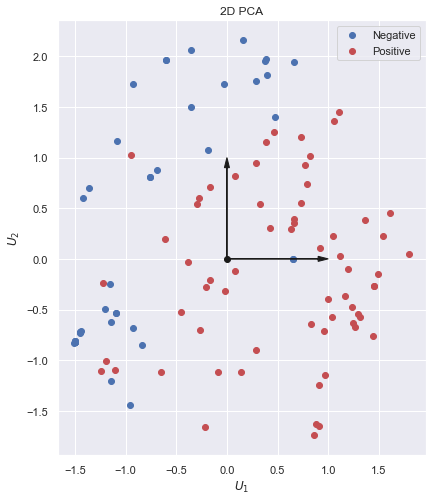

In [22]:
from hw2_functions import PCA_transform, plt_2d_pca
sns.set(font_scale = 1)
X_train_pca, X_test_pca = PCA_transform(X_train, x_test, n_components=2)
plt_2d_pca(X_test_pca, y_test.squeeze())

***How separable is your data when reduced to just two features?***

When reduced to just two features, one can say that our data is indeed linearly separable, when including several misclassificated samples.
That is to say, that the accuracy won't be perfect, and we will result with a certain cost that will be quantified with the loss-function.

## Train the same models on the dimensionality-reduced training set

Logistic Regression:
penalty =  l1 C =  100.0 , lambda =  0.01
Loss =  0.32787419772581916 



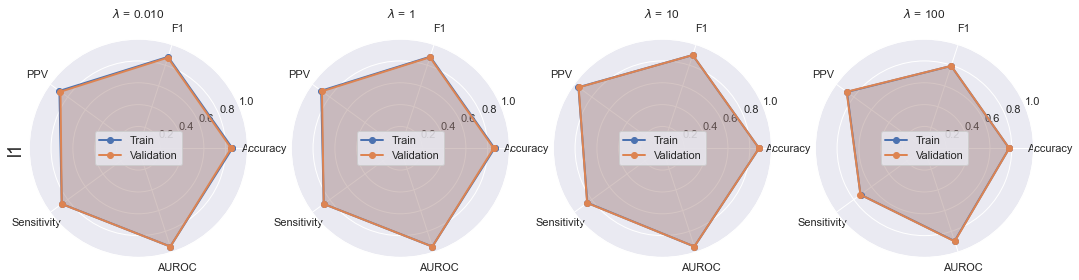

Sensitivity is 0.86
Specificity is 0.87
PPV is 0.90
NPV is 0.81
Accuracy is 0.86
F1 is 0.88
AUROC is 0.93


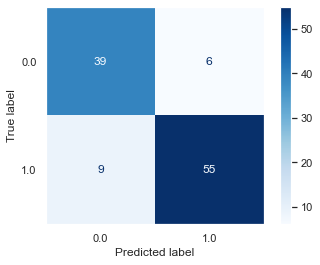

In [23]:
best_model_l1_pca, clf_l1_pca = logReg_optimization('l1', X_train_pca, Y_train, X_test_pca, y_test)

Logistic Regression:
penalty =  l2 C =  0.1 , lambda =  10.0
Loss =  0.3494231534857173 



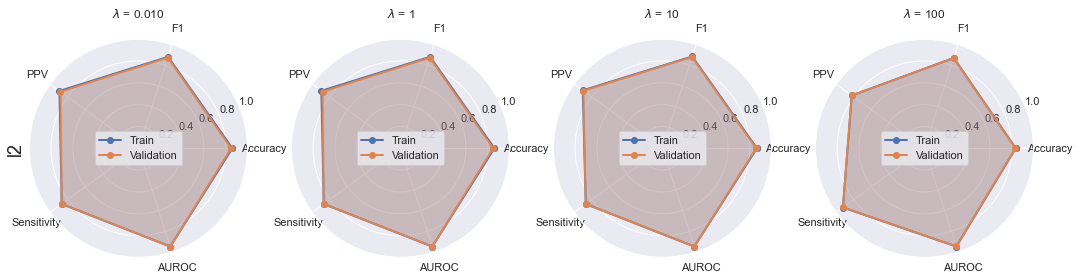

Sensitivity is 0.86
Specificity is 0.87
PPV is 0.90
NPV is 0.81
Accuracy is 0.86
F1 is 0.88
AUROC is 0.93


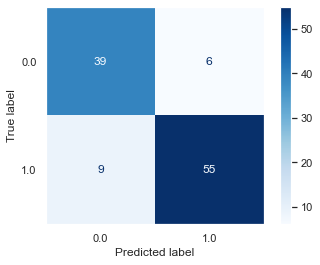

In [24]:
best_model_l2_pca, clf_l2_pca = logReg_optimization('l2', X_train_pca, Y_train, X_test_pca, y_test)

Support vector machine:
kernel =  linear C =  0.01
Loss =  0.5412844036697247 



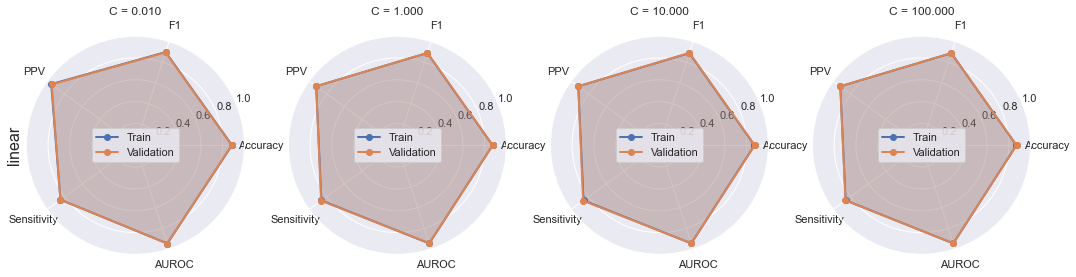

Sensitivity is 0.83
Specificity is 0.93
PPV is 0.95
NPV is 0.79
Accuracy is 0.87
F1 is 0.88
AUROC is 0.93


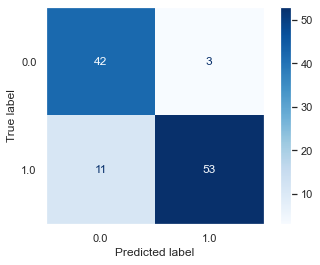

In [25]:
best_svm_linear_pca, svm_linear_pca = SVM_optimization(X_train_pca, Y_train, X_test_pca, y_test, degree=0, kernel='linear')

Support vector machine:
kernel =  poly C =  0.01
Loss =  0.5688073394495413 



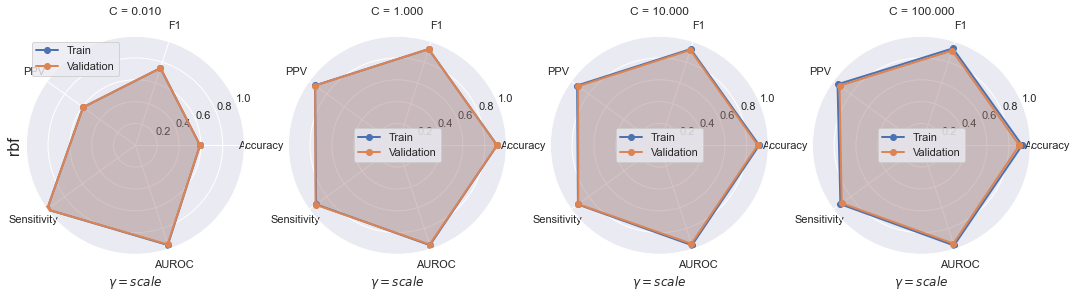

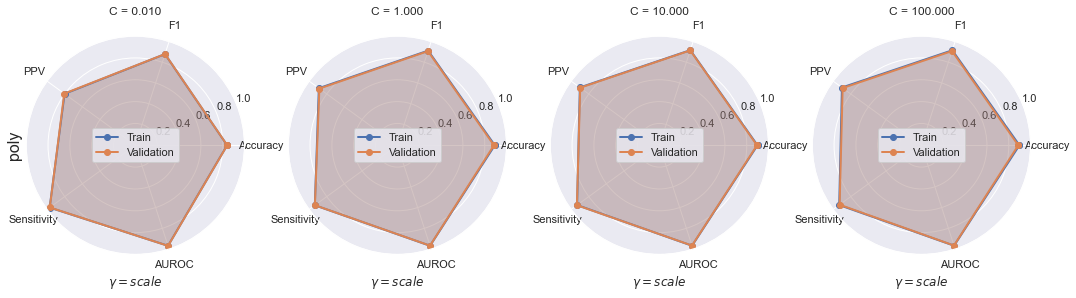

Sensitivity is 0.95
Specificity is 0.69
PPV is 0.81
NPV is 0.91
Accuracy is 0.84
F1 is 0.88
AUROC is 0.96


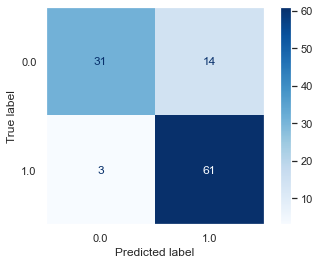

In [26]:
best_svm_nonlinear_pca, svm_nonlinear_pca = SVM_optimization(X_train_pca, Y_train, X_test_pca, y_test, degree=3, kernel='nonlinear')

random forest results: 
Sensitivity is 0.92
Specificity is 0.91
PPV is 0.94
NPV is 0.89
Accuracy is 0.92
F1 is 0.93
AUROC is 0.98


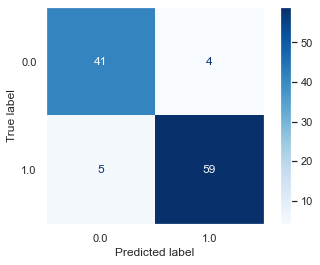

In [27]:
rfc_pac = random_forest_optimization(X_train_pca, Y_train, X_test_pca, y_test)

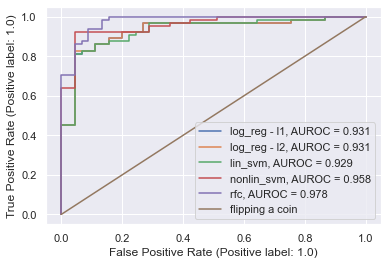

In [28]:
classifiers = [best_model_l1_pca, best_model_l2_pca, best_svm_linear_pca, best_svm_nonlinear_pca, rfc_pac]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, X_test_pca, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1]), decimals=3))
ax.plot(np.linspace(0, 1, X_test_pca.shape[0]), np.linspace(0, 1, X_test_pca.shape[0]))
plt.legend(('log_reg - l1, AUROC = ' + str(roc_score[0]), 'log_reg - l2, AUROC = ' + str(roc_score[1]),
            'lin_svm, AUROC = ' + str(roc_score[2]), 'nonlin_svm, AUROC = ' + str(roc_score[3]),
            'rfc, AUROC = ' + str(roc_score[4]), 'flipping a coin'))
plt.show()

In contrary to the earlier training set - where non-linear SVM resulted as the best training model - now, with the reduced-dimensianal training set, we resulted with Random Forest as the best one.

Note that the best result with the reduced-dimensianal training set is very high, yet **lower** than the best result achieved in the previous dataset. Meaning that reducing the data dimensions might be less efficient when we have great computational resources that can deal with high complexity data.

Having said that, **reducing the dimensions may prevent overfitting** by projecting numerous features onto a N-dimensional plan (in our case: N=2). Thus, considering using this method might be useful even on the expense of decreasing the model performance.

## Train the models on the 2 selected features

We chose the two features that correlates the most with the labeling: **'Increased Urination'** and **'Increased Thirst'**.

C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadas\anaconda3\envs\bm-336546-hw2\lib\site-packages

Logistic Regression:
penalty =  l1 C =  100.0 , lambda =  0.01
Loss =  0.3575075438690713 



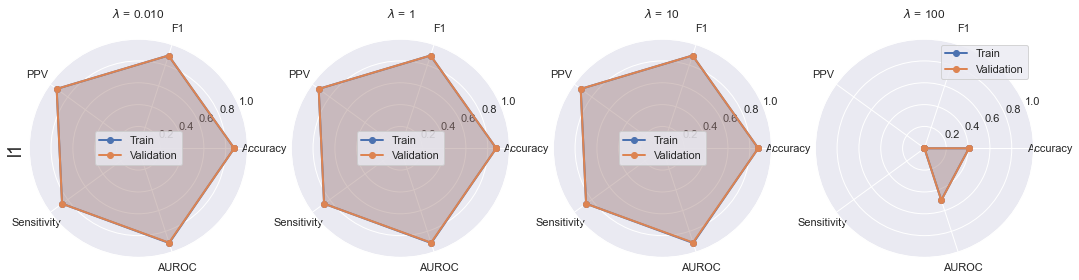

Sensitivity is 0.84
Specificity is 0.87
PPV is 0.90
NPV is 0.80
Accuracy is 0.85
F1 is 0.87
AUROC is 0.89


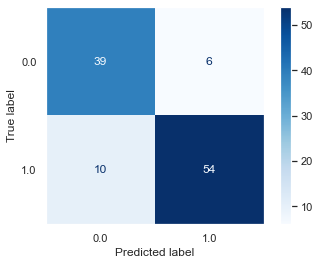

In [29]:
X_train_2feat = X_train[:, indices[0:2]]
X_test_2feat = x_test[:, indices[0:2]]

best_model_l1_2feat, clf_l1_2feat = logReg_optimization('l1', X_train_2feat, Y_train, X_test_2feat, y_test)


Logistic Regression:
penalty =  l2 C =  100.0 , lambda =  0.01
Loss =  0.3574447078507753 



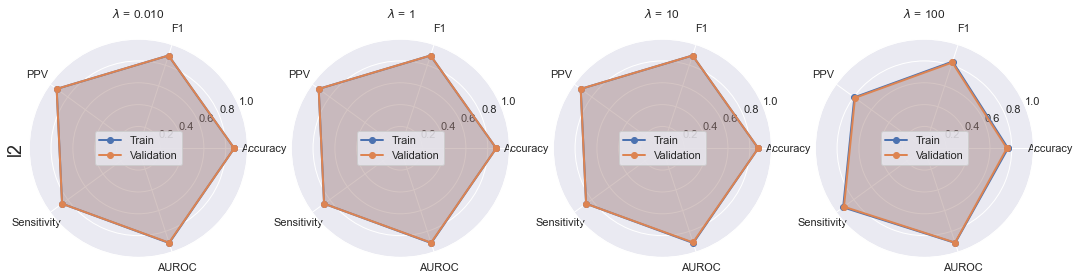

Sensitivity is 0.84
Specificity is 0.87
PPV is 0.90
NPV is 0.80
Accuracy is 0.85
F1 is 0.87
AUROC is 0.89


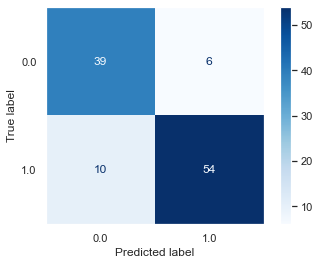

In [30]:
best_model_l2_2feat, clf_l2_2feat = logReg_optimization('l2', X_train_2feat, Y_train, X_test_2feat, y_test)

Support vector machine:
kernel =  linear C =  1.0
Loss =  0.5596330275229358 



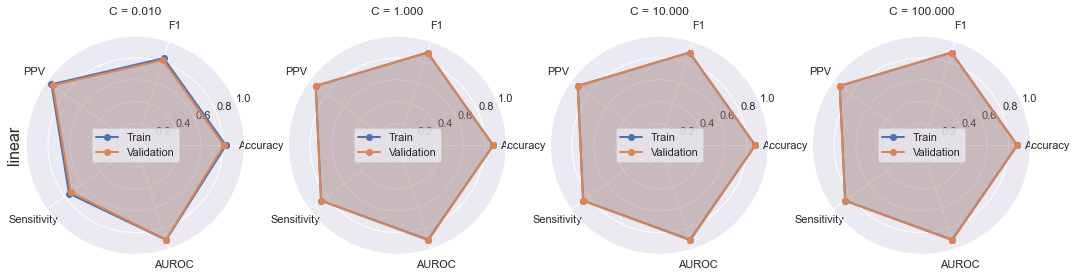

Sensitivity is 0.84
Specificity is 0.87
PPV is 0.90
NPV is 0.80
Accuracy is 0.85
F1 is 0.87
AUROC is 0.89


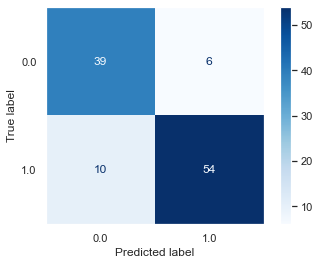

In [31]:
best_svm_linear_2feat, svm_linear_2feat = SVM_optimization(X_train_2feat, Y_train, X_test_2feat, y_test, degree=0, kernel='linear')

Support vector machine:
kernel =  poly C =  1.0
Loss =  0.5596330275229358 



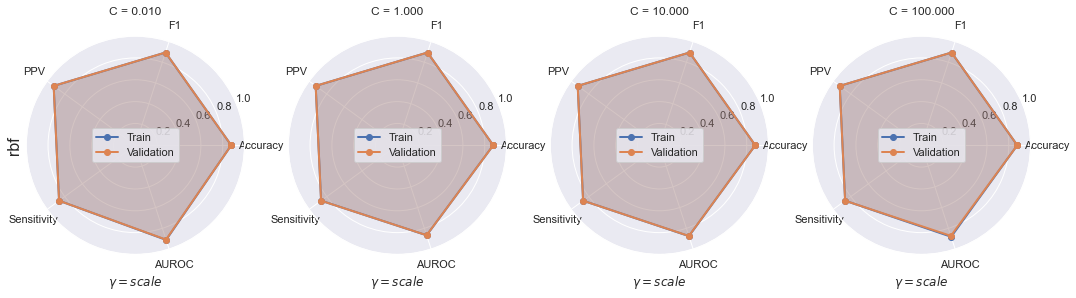

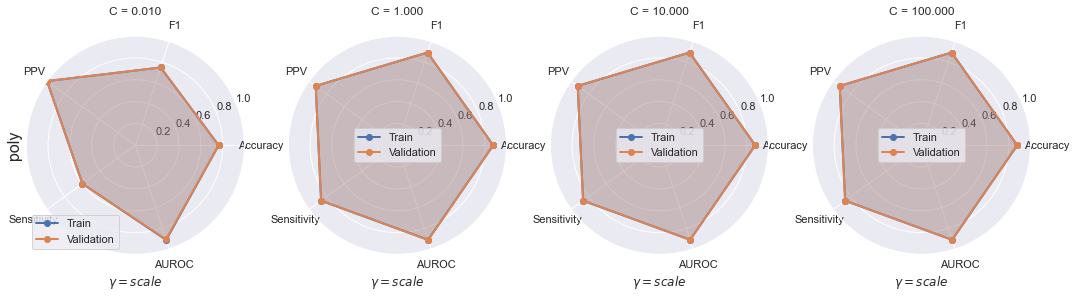

Sensitivity is 0.84
Specificity is 0.87
PPV is 0.90
NPV is 0.80
Accuracy is 0.85
F1 is 0.87
AUROC is 0.89


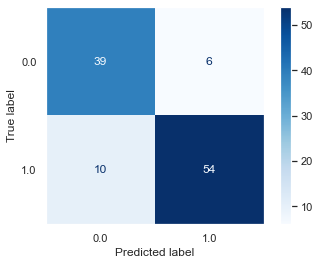

In [32]:
best_svm_nonlinear_2feat, svm_nonlinear_2feat = SVM_optimization(X_train_2feat, Y_train, X_test_2feat, y_test, degree=3,
                                                                 kernel='nonlinear')

random forest results: 
Sensitivity is 0.84
Specificity is 0.87
PPV is 0.90
NPV is 0.80
Accuracy is 0.85
F1 is 0.87
AUROC is 0.89


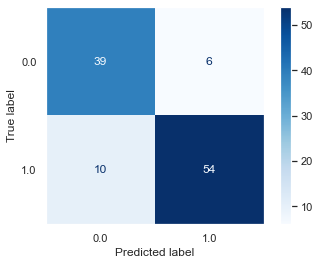

In [33]:
rfc_2feat = random_forest_optimization(X_train_2feat, Y_train, X_test_2feat, y_test)

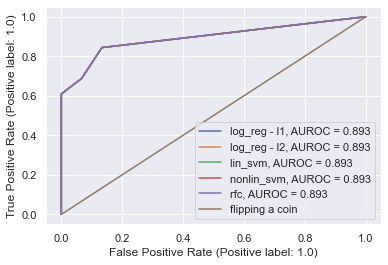

In [34]:
classifiers = [best_model_l1_2feat, best_model_l2_2feat, best_svm_linear_2feat, best_svm_nonlinear_2feat, rfc_2feat]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, X_test_2feat, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(X_test_2feat)[:, 1]), decimals=3))
ax.plot(np.linspace(0, 1, X_test_2feat.shape[0]), np.linspace(0, 1, X_test_2feat.shape[0]))
plt.legend(('log_reg - l1, AUROC = ' + str(roc_score[0]), 'log_reg - l2, AUROC = ' + str(roc_score[1]),
            'lin_svm, AUROC = ' + str(roc_score[2]), 'nonlin_svm, AUROC = ' + str(roc_score[3]),
            'rfc, AUROC = ' + str(roc_score[4]), 'flipping a coin'))
plt.show()

Above we can see the results for the ***selected-2-features*** model.

**The reduced-dimensionality performed better than the selected-2-features.**

That implies for some other different features that do have useful influence for our prediction model, and were ignored in the model above but was included in the reduced-dimensionality model.

This is an example of how over-simplifying a model can impair our results, and that we should try and find the balance between complexity in the one hand, and simplicity in the other hand.